# Example of a synthetic time series plot

This notebook generates an example figure of synthetic time series compared with historical data.

In [1]:
import os, sys
sys.path.append('..')

import time_series as ts
import entso_e

import numpy as np
import matplotlib.pyplot as plt

Specify the directory in which the historical data is stored:

In [4]:
data_source = os.path.expanduser('~/data/entso-e/raw')

Specify the country and years range:

In [6]:
country = 'CH'
years_range = list(range(2015, 2024))

### Historical data

Load the historical data and fix the missing values:

In [7]:
data = entso_e.extract_load_time_series(data_source, country, years_range)
data = list(map(lambda x: ts.interpolate_missing_values(x, verbose=False), data))

Turn the data into periodic time series:

In [6]:
historic_series = np.array(list(map(lambda x: ts.make_364_periodic(x, verbose=False), data)))

### Synthetic time series

Import a model for the synthetic time series:

In [8]:
model = ts.create_model(data, years_range, reduce=False, verbose=False)

Generate the series:

In [7]:
synthetic_series = ts.generate_time_series(model, 2)

### Plot

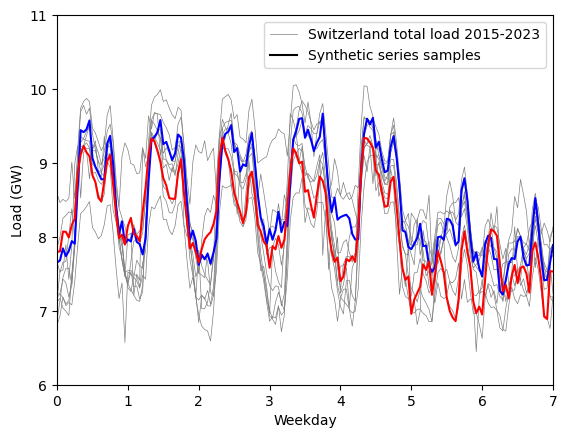

In [8]:
plt.plot(1e-3 * historic_series[:, 7*24:2*7*24+1].transpose(), color='gray', linewidth=0.5,
         label=['Switzerland total load 2015-2023' if i == 0 else '' for i in range(historic_series.shape[0])])
plt.plot(1e-3 * synthetic_series[0, 7*24:2*7*24+1], color='blue')
plt.plot(1e-3 * synthetic_series[1, 7*24:2*7*24+1], color='red')
plt.plot([0, 0], [0, 0], color='black', label='Synthetic series samples')
plt.xlim(0, 7*24)
plt.xticks(range(0, 8*24, 24), range(0, 8))
plt.xlabel('Weekday')
plt.ylim(6,11)
plt.ylabel('Load (GW)')
plt.legend()
plt.savefig('time_series_example.png', dpi=300, bbox_inches='tight')
plt.show()